In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
sns.set()

In [82]:
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
start_time = datetime.now()

In [83]:
def assessment(f_data, f_y_feature, f_x_feature, f_index=-1):
    """
    Develops and displays a histogram and a scatter plot for a dependent / independent variable pair from
    a dataframe and, optionally, highlights a specific observation on the plot in a different color (red).

    Also optionally, if an independent feature is not informed, the scatterplot is not displayed.

    Keyword arguments:

    f_data      Tensor containing the dependent / independent variable pair.
                Pandas dataframe
    f_y_feature Dependent variable designation.
                String
    f_x_feature Independent variable designation.
                String
    f_index     If greater or equal to zero, the observation denoted by f_index will be plotted in red.
                Integer
    """
    for f_row in f_data:
        if f_index >= 0:
            f_color = np.where(f_data[f_row].index == f_index,'r','g')
            f_hue = None
        else:
            f_color = 'b'
            f_hue = None

    f_fig, f_a = plt.subplots(1, 2, figsize=(16,4))

    f_chart1 = sns.distplot(f_data[f_x_feature], ax=f_a[0], kde=False, color='orangered')
    f_chart1.set_xlabel(f_x_feature,fontsize=10)

    if f_index >= 0:
        f_chart2 = plt.scatter(f_data[f_x_feature], f_data[f_y_feature], c=f_color, edgecolors='w')
        f_chart2 = plt.xlabel(f_x_feature, fontsize=10)
        f_chart2 = plt.ylabel(f_y_feature, fontsize=10)
    else:
        f_chart2 = sns.scatterplot(x=f_x_feature, y=f_y_feature, data=f_data, hue=f_hue, legend=False)
        f_chart2.set_xlabel(f_x_feature,fontsize=10)
        f_chart2.set_ylabel(f_y_feature,fontsize=10)

    plt.show()


def correlation_map(f_data, f_feature, f_number):
    """
    Develops and displays a heatmap plot referenced to a primary feature of a dataframe, highlighting
    the correlation among the 'n' mostly correlated features of the dataframe.

    Keyword arguments:

    f_data      Tensor containing all relevant features, including the primary.
                Pandas dataframe
    f_feature   The primary feature.
                String
    f_number    The number of features most correlated to the primary feature.
                Integer
    """
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()

    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True

    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(40, 20))
        f_map = sns.heatmap(f_correlation, mask=f_mask, vmin=-1, vmax=1, square=True,
                            center=0, cmap="RdYlBu")
    plt.show()

In [84]:
# Importing the dataset
dataset = pd.read_csv("C:/Users/hanif/Desktop/BE-2020/Semester 7/ML/Project/WinnipegDataset.txt")
dataset = dataset.sample(frac=1)

In [85]:
dataset.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
273328,6,-18.777,-27.638,-16.4460,-20.650,-16.7290,-21.081,-2.3310,-8.8614,-11.1920,...,1.00000,1.00000,5.8889,0.098765,0.94444,0.11111,0.11111,0.34883,0.80247,1.000000e+00
249322,6,-17.276,-27.654,-19.8050,-21.626,-17.5540,-21.897,2.5292,-10.3780,-7.8488,...,0.33333,0.70711,1.3333,0.222220,0.72222,0.55556,0.55556,1.27300,0.30864,1.676400e-08
157139,4,-10.922,-18.999,-9.3562,-13.109,-9.4729,-13.219,-1.5660,-8.0768,-9.6428,...,0.13580,0.59316,1.5556,0.246910,0.77778,0.44444,0.44444,1.36890,0.25926,1.000000e-01
302211,6,-18.348,-27.257,-19.8270,-22.456,-18.1050,-22.392,1.4785,-8.9086,-7.4300,...,0.33333,0.44721,1.2222,0.172840,0.94444,0.11111,0.11111,0.68374,0.62963,6.614400e-01
249619,6,-17.885,-28.178,-19.6440,-22.829,-17.4300,-22.706,1.7589,-10.2930,-8.5342,...,0.33333,0.47434,2.0000,0.000000,1.00000,0.00000,0.00000,-0.00000,1.00000,1.000000e+00


In [86]:
class_share = pd.Series(100 * dataset['label'].value_counts(normalize=True).sort_index())
print('Class share\n')

# Iterate over all possible class labels (assuming labels are integers)
for class_label in range(1, 8):
    share = class_share.get(class_label, 0)
    print(f'Class {class_label}: {share:.2f} %')

Class share

Class 1: 12.02 %
Class 2: 1.10 %
Class 3: 23.22 %
Class 4: 22.73 %
Class 5: 14.46 %
Class 6: 26.11 %
Class 7: 0.35 %


Text(0, 0.5, 'Share (%)')

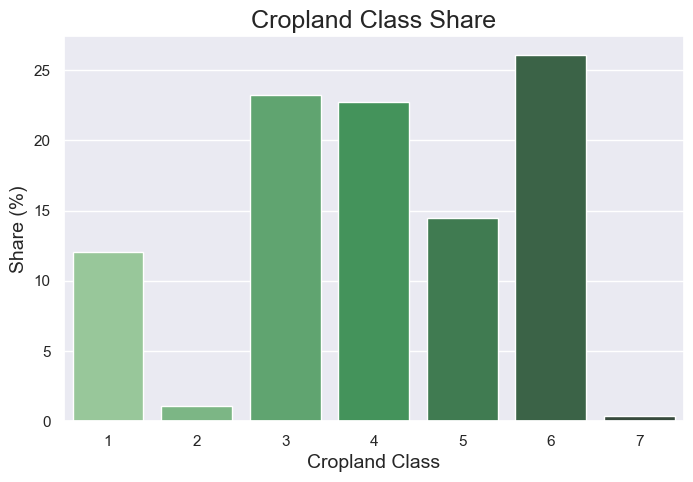

In [87]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(ax=ax, x = class_share.index, y = class_share, palette='Greens_d')
plt.title('Cropland Class Share', fontsize=18)
plt.xlabel('Cropland Class', fontsize=14)
plt.ylabel('Share (%)', fontsize=14)

In [88]:

highly_correlated_feature_pairs = []
highly_correlated_features_to_drop = []

correlation_matrix = dataset.corr().abs()
upper_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
for row in range(upper_matrix.shape[0]):
    for column in range(upper_matrix.shape[1]):
        if upper_matrix.iloc[row, column] > 0.95:
            highly_correlated_feature_pairs.append([row, column, upper_matrix.iloc[row, column]])

print(f'Number of highly intercorrelated feature pairs: {len(highly_correlated_feature_pairs)}')

Number of highly intercorrelated feature pairs: 117


In [89]:
highly_correlated_feature_pairs = pd.DataFrame(highly_correlated_feature_pairs).sort_values(by=[2], ascending=False)
highly_correlated_feature_pairs.columns = ['feature_1', 'feature_2', 'correl']
highly_correlated_feature_pairs.head(10)

,feature_1,feature_2,correl
4,2,39,1.000000
38,51,88,1.000000
109,151,153,1.000000
45,54,86,1.000000
8,5,37,1.000000
102,142,147,1.000000
113,156,157,0.998716
13,7,15,0.995524
10,6,38,0.995455
60,62,79,0.995254


In [90]:
highly_correlated_features_to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.95)]
dataset = dataset.drop(dataset[highly_correlated_features_to_drop], axis=1)

In [91]:
nr_features = dataset.shape[1] - 1
print(f'Optimized number of features: {nr_features}')

Optimized number of features: 102


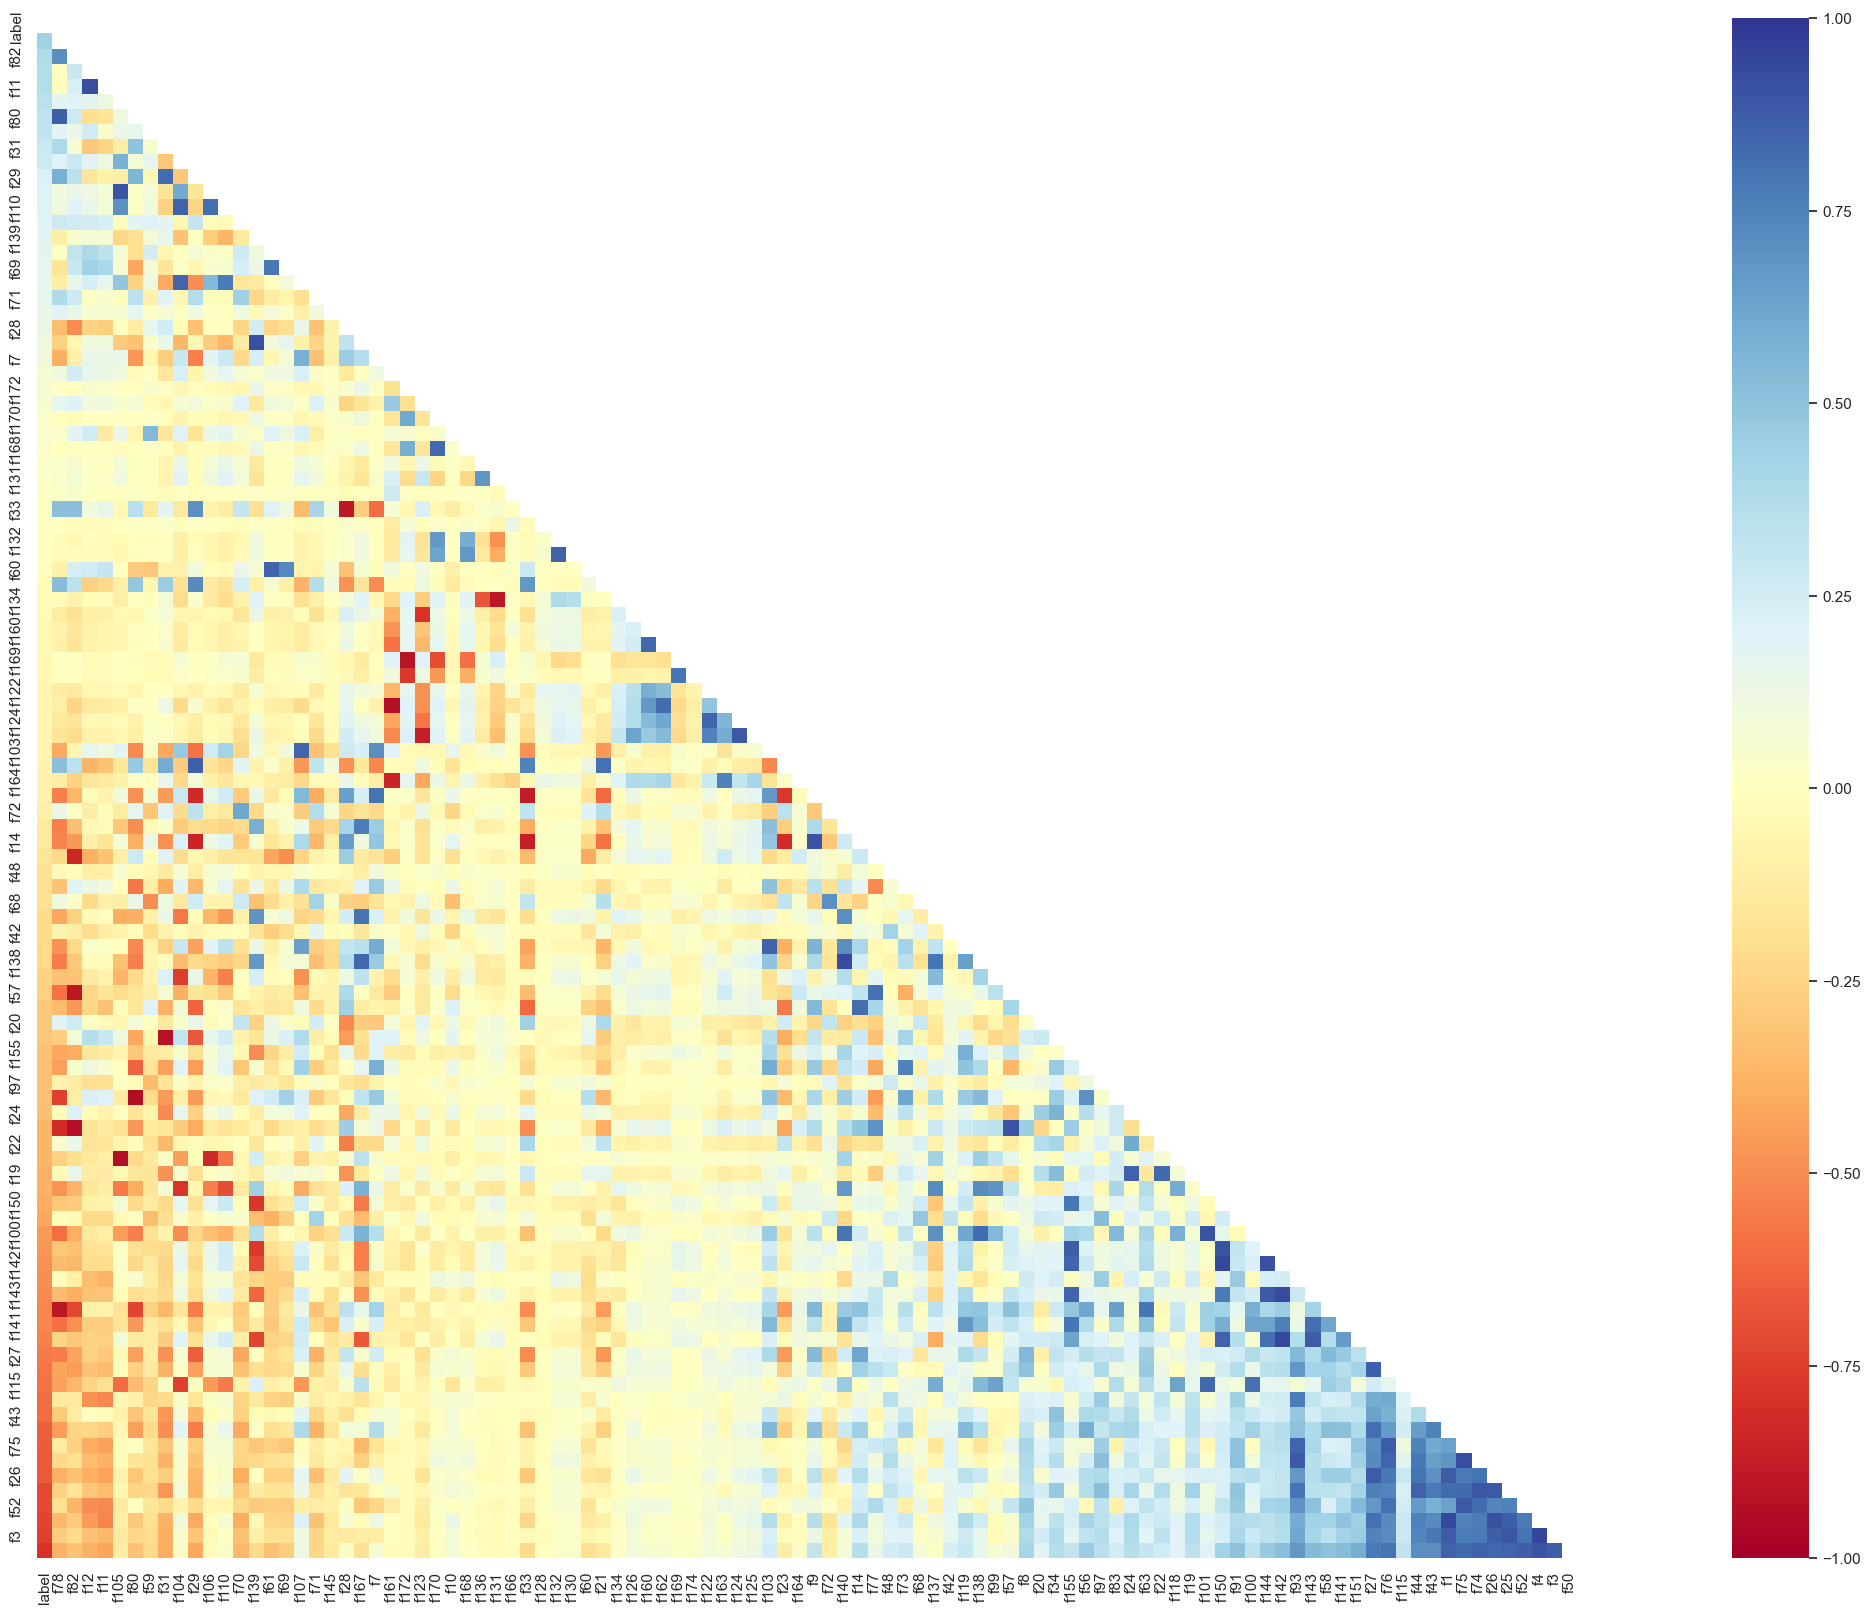

In [92]:
correlation_map(dataset, 'label', nr_features)

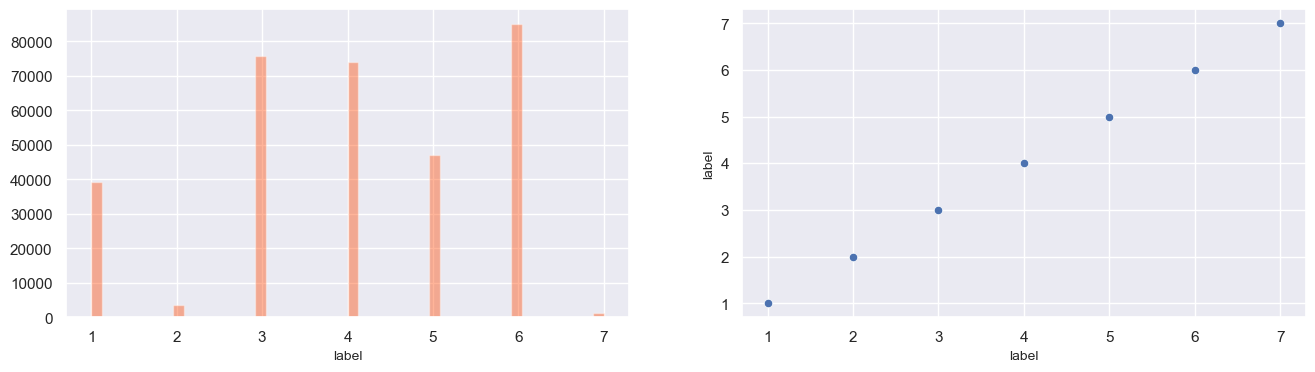

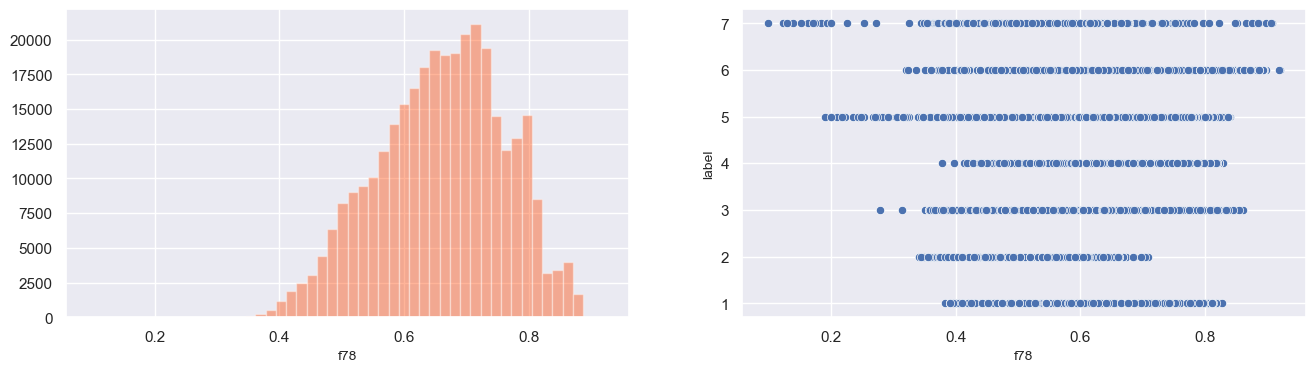

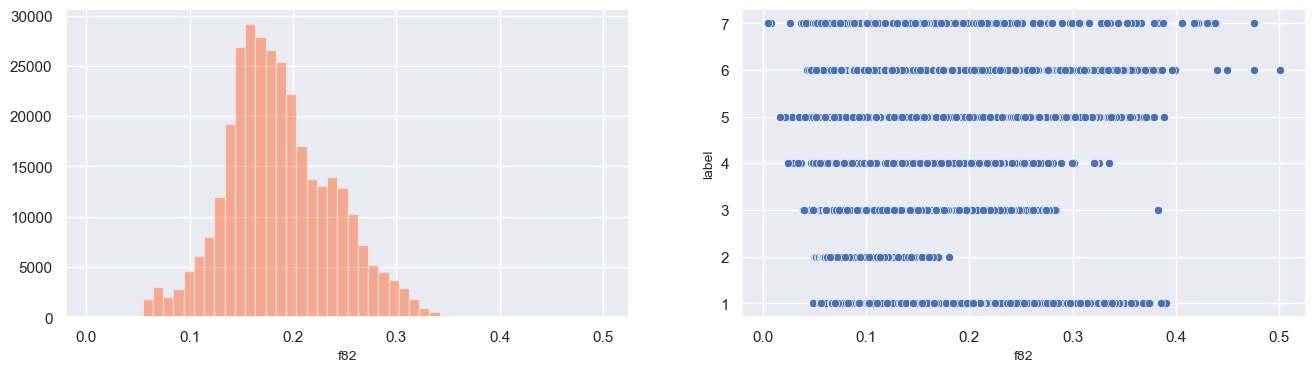

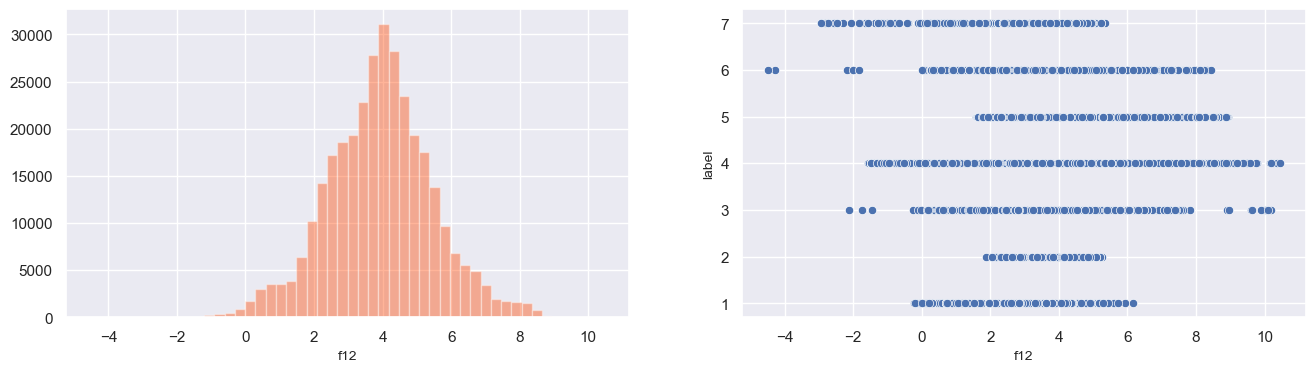

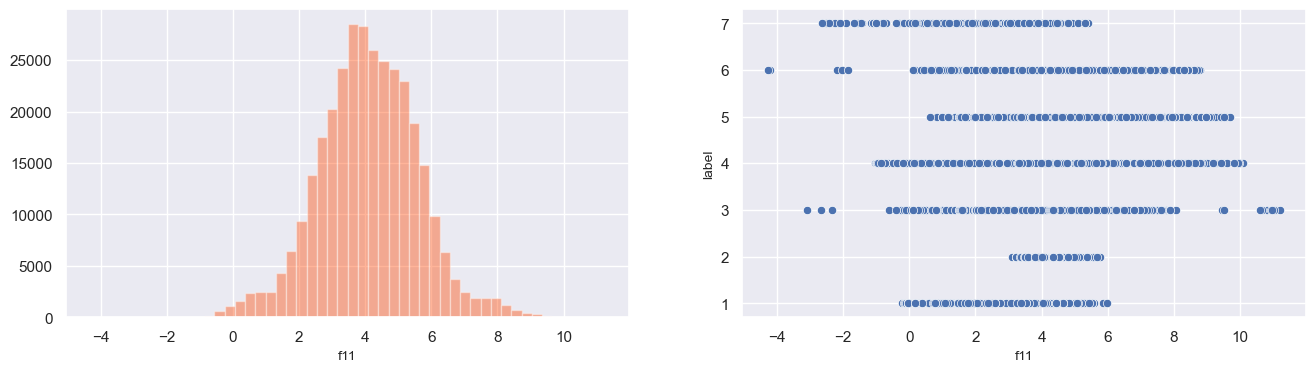

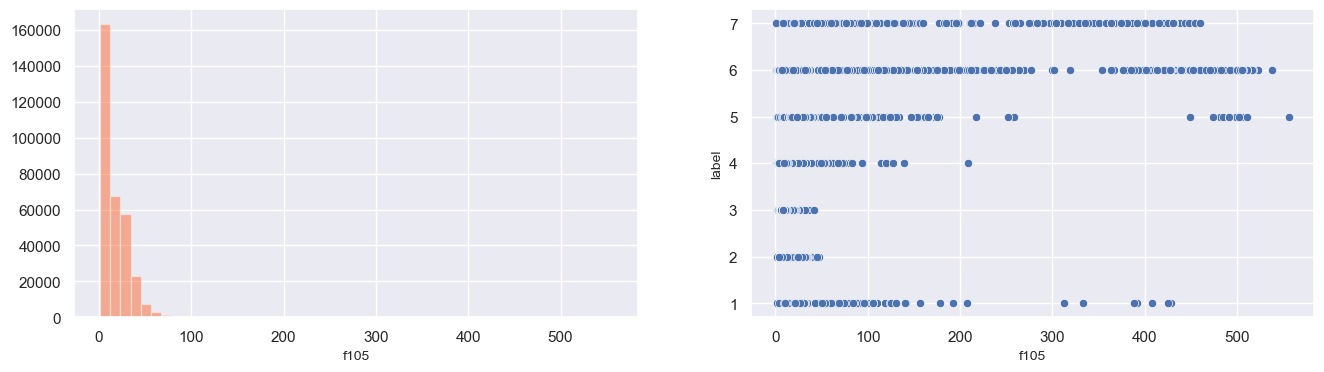

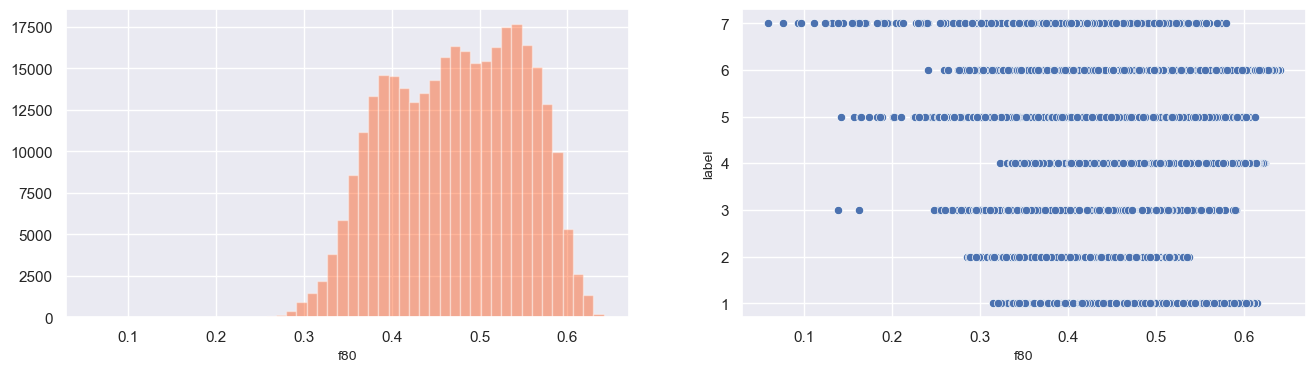

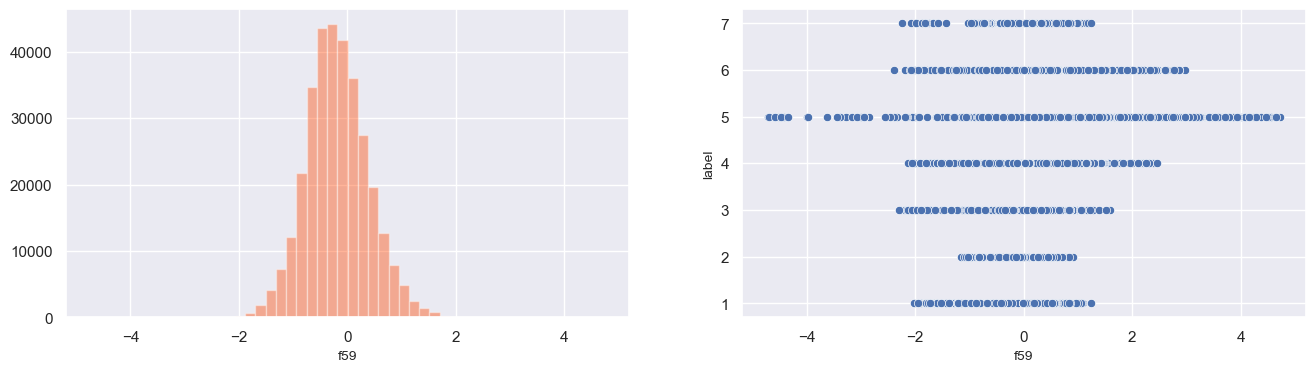

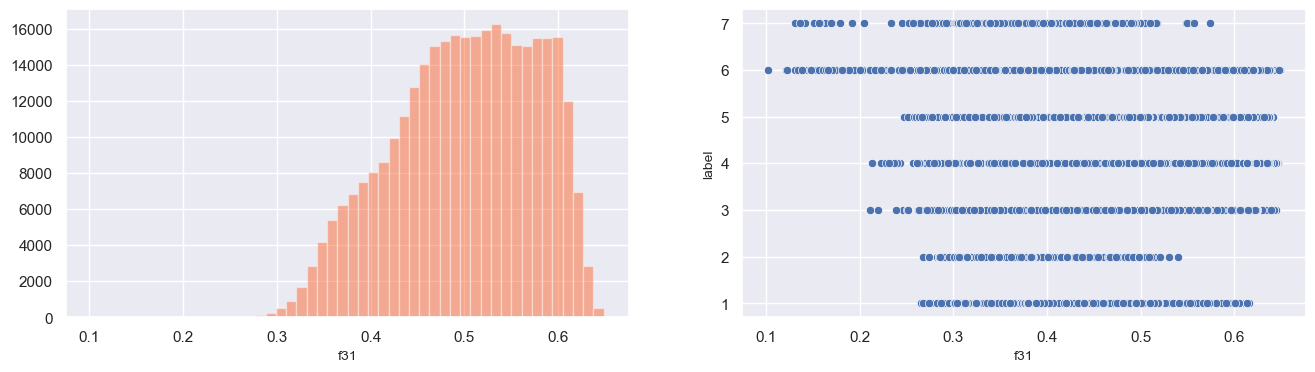

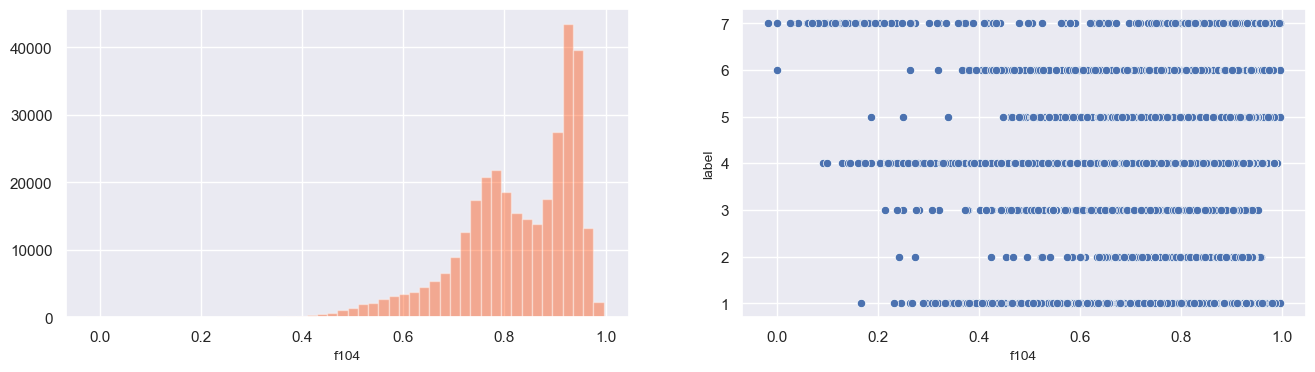

In [93]:
most_correlated_features = dataset.corr().nlargest(10,'label')['label'].index

for column in most_correlated_features:
    assessment(dataset, 'label', column, -1)

In [94]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0:1]

In [95]:
train_size = round(0.8 * len(X))

In [96]:
X_train = X.iloc[:train_size, :].values
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:, :].values
y_test = y.iloc[train_size:]

In [98]:
class_count = pd.Series(y_test.label.value_counts()).sort_index()
print('Class count - Test labels\n')

# Iterate over the actual unique class labels present in the dataset
for class_label, count in class_count.items():
    print(f'Class {class_label}: {count}')

Class count - Test labels

Class 1: 7776
Class 2: 731
Class 3: 15126
Class 4: 14878
Class 5: 9526
Class 6: 16908
Class 7: 222


In [99]:
y_train_rf = y_train.label.values
y_test_rf = y_test.label.values

y_train_ann = pd.get_dummies(y_train.label).values
y_test_ann = pd.get_dummies(y_test.label).values

In [100]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, n_jobs=4)

random_forest_classifier.fit(X_train, y_train_rf)

RandomForestClassifier(n_jobs=4)

In [102]:
y_pred_rf = random_forest_classifier.predict(X_test)

In [103]:
print(f'Predicted class: {y_pred_rf[0]}')
print(f'Actual class: {y_test_rf[0]}')

Predicted class: 4
Actual class: 4


In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define your model
ann_classifier = Sequential()

# Input layer and first dense layer
ann_classifier.add(Dense(units=204, kernel_initializer='uniform', activation='relu', input_dim=102))
ann_classifier.add(Dropout(0.1))

# Second dense layer
ann_classifier.add(Dense(units=204, kernel_initializer='uniform', activation='relu'))
ann_classifier.add(Dropout(0.1))

# Third dense layer
ann_classifier.add(Dense(units=102, kernel_initializer='uniform', activation='relu'))
ann_classifier.add(Dropout(0.1))

# Output layer
ann_classifier.add(Dense(units=7, kernel_initializer='uniform', activation='softmax'))

# Model compilation
optim = Adam(learning_rate=0.0005)
ann_classifier.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
ann_train_history = ann_classifier.fit(X_train, y_train_ann, batch_size = 64, epochs = 20, verbose=0)

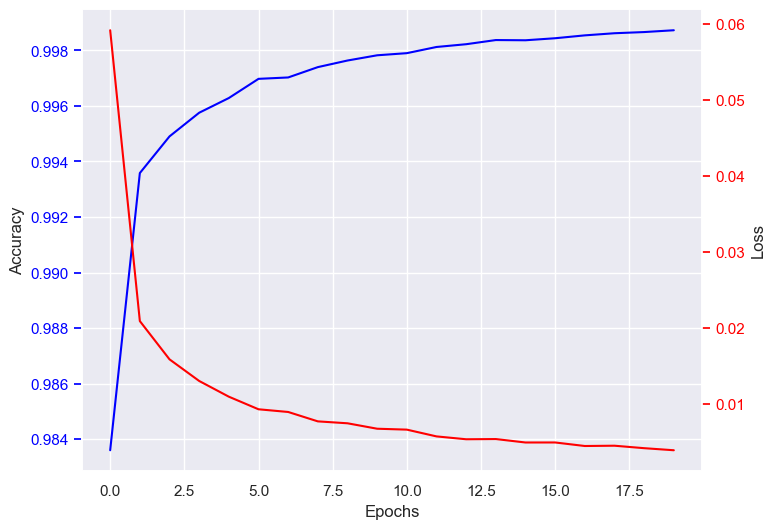

In [106]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.set_style("darkgrid")
ax2 = ax1.twinx()
ax1.plot(ann_train_history.history['accuracy'], color='blue')
ax2.plot(ann_train_history.history['loss'], color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='y', colors='blue')
ax2.set_ylabel('Loss')
ax2.tick_params(axis='y', colors='red')
ax2.grid(False)
plt.show()

In [107]:
y_pred_ann = ann_classifier.predict(X_test)
for i in range(len(y_pred_ann)):
    for j in range(7):
        if y_pred_ann[i][j] == y_pred_ann[i].max():
            y_pred_ann[i][j] = 1
        else:
            y_pred_ann[i][j] = 0
y_pred_ann = y_pred_ann.astype(int)

2037/2037 [==============================] - 9s 4ms/step


In [108]:
print(f'Predicted: {y_pred_ann[0]}')
print(f'Actual: {y_test_ann[0]}')

Predicted: [0 0 0 1 0 0 0]
Actual: [False False False  True False False False]


In [109]:
rf_cm = np.zeros((7,7))

In [110]:
rf_pred_correct = 0
rf_pred_incorrect = 0
for i in range(len(y_test)):
    rf_index_test = y_test_rf[i] - 1
    rf_index_pred = y_pred_rf[i] - 1
    rf_cm[rf_index_test][rf_index_pred] += 1
    if rf_index_test == rf_index_pred:
        rf_pred_correct += 1
    else:
        rf_pred_incorrect += 1

In [111]:
rf_cmatrix = pd.DataFrame(rf_cm.astype(int),
                          index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                          columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
rf_cmatrix

,Corn,Pea,Canola,Soy,Oat,Wheat,Broadleaf
Corn,7743,0,7,20,2,2,2
Pea,3,727,0,1,0,0,0
Canola,0,1,15109,3,8,5,0
Soy,4,0,7,14833,22,12,0
Oat,4,0,2,25,9441,45,9
Wheat,7,0,2,13,27,16858,1
Broadleaf,0,0,1,0,0,1,220


In [112]:
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_precision, rf_recall, rf_f_score, rf_support = precision_recall_fscore_support(y_test_rf, y_pred_rf, average='macro')
print(f'Accuracy: {rf_accuracy * 100:.2f} %')
print(f'Precision: {rf_precision * 100:.2f} %')
print(f'Recall: {rf_recall * 100:.2f} %')
print(f'F-Score: {rf_f_score * 100:.2f} %')

Accuracy: 99.64 %
Precision: 98.99 %
Recall: 99.50 %
F-Score: 99.24 %


In [113]:
print('Accuracy per class\n')
for i in range(len(rf_cmatrix)):
    class_accuracy = rf_cmatrix.iloc[i,i] / rf_cmatrix.sum(axis=0)[i]
    print(f'{rf_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Corn: 99.77 %
Pea: 99.86 %
Canola: 99.87 %
Soy: 99.58 %
Oat: 99.38 %
Wheat: 99.62 %
Broadleaf: 94.83 %


In [114]:
ann_cm = np.zeros((7,7))

In [115]:
ann_pred_correct = 0
ann_pred_incorrect = 0
for i in range(len(y_test_ann)):
    if y_pred_ann[i].sum() > 0:
        ann_index_test = np.where(y_test_ann[i] == 1)[0][0]
        ann_index_pred = np.where(y_pred_ann[i] == 1)[0][0]
        ann_cm[ann_index_test][ann_index_pred] += 1
        if ann_index_test == ann_index_pred:
            ann_pred_correct += 1
        else:
            ann_pred_incorrect += 1

In [116]:
ann_cmatrix = pd.DataFrame(ann_cm.astype(int),
                           index = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'],
                           columns = ['Corn', 'Pea', 'Canola', 'Soy', 'Oat', 'Wheat', 'Broadleaf'])
ann_cmatrix

,Corn,Pea,Canola,Soy,Oat,Wheat,Broadleaf
Corn,7726,0,2,46,0,1,1
Pea,0,729,1,0,0,0,1
Canola,0,0,15119,1,3,3,0
Soy,0,0,9,14855,11,3,0
Oat,1,0,3,11,9487,17,7
Wheat,10,0,6,7,31,16853,1
Broadleaf,1,0,1,1,1,0,218


In [117]:
ann_accuracy = accuracy_score(y_test_ann, y_pred_ann)
ann_precision, ann_recall, ann_f_score, ann_support = precision_recall_fscore_support(y_test_ann, y_pred_ann, average='macro')
print(f'Accuracy: {ann_accuracy * 100:.2f} %')
print(f'Precision: {ann_precision * 100:.2f} %')
print(f'Recall: {ann_recall * 100:.2f} %')
print(f'F-Score: {ann_f_score * 100:.2f} %')

Accuracy: 99.72 %
Precision: 99.18 %
Recall: 99.48 %
F-Score: 99.33 %


In [118]:
print('Accuracy per class\n')
for i in range(len(ann_cmatrix)):
    class_accuracy = ann_cmatrix.iloc[i,i] / ann_cmatrix.sum(axis=0)[i]
    print(f'{ann_cmatrix.columns[i]}: {class_accuracy*100:.2f} %')

Accuracy per class

Corn: 99.84 %
Pea: 100.00 %
Canola: 99.85 %
Soy: 99.56 %
Oat: 99.52 %
Wheat: 99.86 %
Broadleaf: 95.61 %


In [119]:
end_time = datetime.now()

print('\nStart time: ', start_time)
print('\nEnd time: ', end_time)
print('\nElapsed time: ', end_time - start_time)


Start time:  2024-01-01 22:47:45.139021

End time:  2024-01-01 23:22:29.007873

Elapsed time:  0:34:43.868852


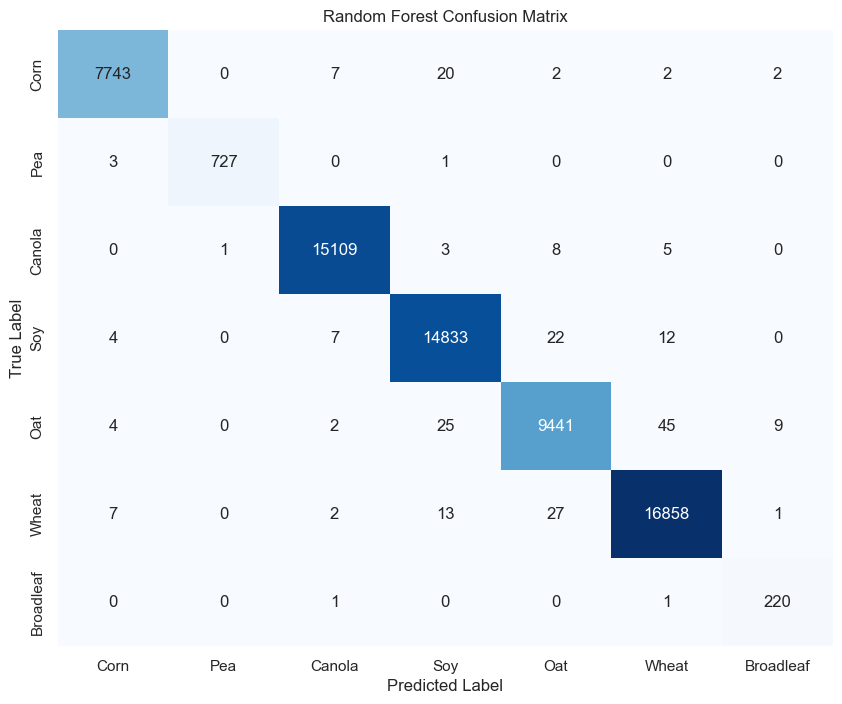

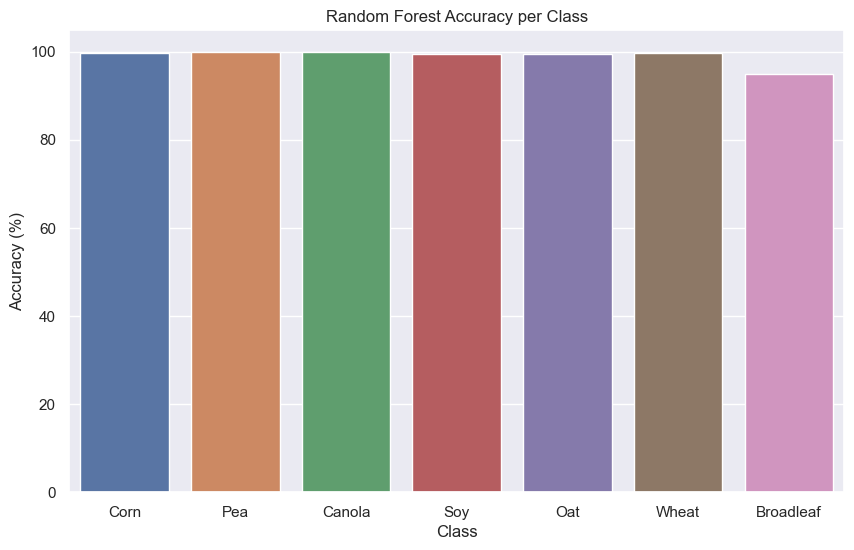

In [120]:
# Assuming rf_cmatrix is defined in a previous cell
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cmatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_cmatrix.columns, yticklabels=rf_cmatrix.index)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Bar Plot for Accuracy per Class
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_cmatrix.columns, y=rf_cmatrix.values.diagonal() / rf_cmatrix.sum(axis=0) * 100)
plt.title('Random Forest Accuracy per Class')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.show()